# <span style="color:#F72585"><center>Modelos Lineales Generalizados</center></span>



<figure>
<center>
<img src="../Imagenes/moon.jpg" width="600" height="600" align="center" /> 
</center>   
</figure>

<a href="https://commons.wikimedia.org/wiki/File:Moon_in_Blue_Sky.jpg">Keshani Kaveesha</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

## <span style="color:#4361EE">Referencias</span>

1. [Dobson y Baernett, An introduction oto Generalizer Linear Modesl](http://library.lol/main/472B57FA461867F6CFB4334BFED60010)

## <span style="color:#4361EE">Introducción</span>

El proceso de modelación estadística clásicamente incluye los siguientes pasos:

1. Especificar los modelos en dos partes: ecuaciones que relacionan la respuesta con variables exploratorias y la distribución de probabilidad de la   variable respuesta.
1. Estimar los parámetros usados en los modelos.
1. Chequear que tan bien los modelos ajustan a los datos reales.
1. Hacer inferencias; Por ejemplo calculando intervalos de confianza o de credibilidad, pruebas de hipótesis acerca de los parámetros y de los modelos.


## <span style="color:#4361EE">Familia exponencial de distribuciones</span>

La familia exponencial de distribuciones es un conjunto de distribuciones muy especial. Muchas propiedades que poseen la hacen muy atrayente para  la modelación  estadística. Algunas de las distribuciones más notables de la probabilidad pertenecen a ella, lo que facilita el desarrollo de modelos de regresión relativamente sencillos.

Consideremos una variable aleatoria $Y$ cuya función de probabilidad depende de un parámetro $\theta$. La distribución pertenece a la familia exponencial si y solo sí puede escribirse en la forma

$$
f(y|\theta) = \exp\left[a(y)b(\theta) + c(\theta) + d(y) \right],
$$

en  donde $a, b, c, d$ son funciones conocidas.

* Si $a(y) = y$, se dice que la expresión de la densidad está en `forma canónica`.
* $b(\theta)$ se llama parámetro canónico.
* Si la distribución tiene otros parámetros, estos se denominan parámetros de ruido.


Los siguientes son los tres ejemplos más notables de distribuciones de la familia exponencial.


### <span style="color:#4CC9F0">Distribución normal</span>

Arriba hemos escrito la forma como comúnmente se conoce esta distribución. Se deja al lector verificar que esta densidad se puede reescribir en la forma. 

$$
f(y|\theta, \sigma^2) = \exp \left[-\frac{y^2}{2\sigma^2}  + \frac{y\theta}{\sigma^2} - \frac{\theta^2}{2\sigma^2} - \frac{1}{2}\log (2\pi \sigma^2) \right].
$$

En este caso, el parámetro de interés de $\theta$ y $\sigma^2$ es un parámetro de ruido. Se tiene que:

* La densidad está en su forma canónica, pues si  $a(y) = y$,
* El parámetro natural es $b(\theta) = \frac{\theta}{\sigma^2}$,
* $c(\theta) = - \frac{\theta^2}{2\sigma^2} - \frac{1}{2}\log (2\pi \sigma^2) $, 
* $d(y) =  -\frac{y^2}{2\sigma^2}$.

Se puede verificar que si una variable aleatoria $Y$ tiene distribución $\text{N}(\theta, \sigma^2)$, entonces

* $E[Y] = \theta$,
* $Var[Y] = \sigma^2$.

El siguiente fragmento de 


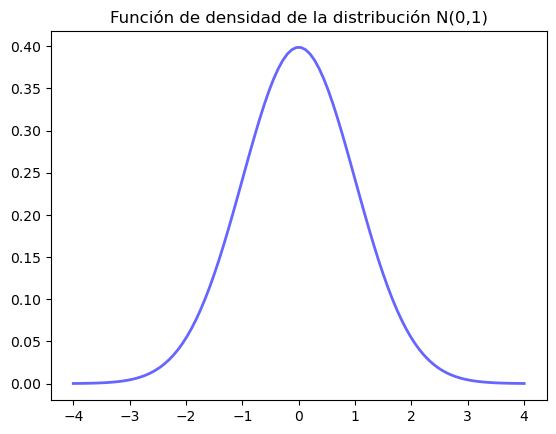

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 0
sigma = 1
normal = norm(mu, sigma)

x = np.linspace(-4,  4, 100)
y = normal.pdf(x)
plt.plot(x, y, 'b', lw=2, alpha=0.6)
plt.title('Función de densidad de la distribución N(0,1)')
plt.show()

Con el siguiente código calculamos la media varianza y algunos cuantiles de la distribución $\text{N}(0,1)$.

In [20]:
# media y varianza de la distribución Normal(0,1)
import numpy as np
from scipy.stats import norm

mu = 0
sigma = 1
normal = norm(mu, sigma)
media, var = normal.stats(moments="mv")
print('Distribución Normal(0,1); media = {}, varianza = {}'.format(media, var, curtosis ))

# calcula algunos cuantiles de la distribución
prob = np.array([0.025,  0.5, 0.975])
cuantiles = normal.ppf(prob)
print('Distribución Normal(0,1); probabilidades={}; cuantiles={}'.format(prob, np.round(cuantiles,3)))

Distribución Normal(0,1); media = 0.0, varianza = 1.0
Distribución Normal(0,1); probabilidades=[0.025 0.5   0.975]; cuantiles=[-1.96  0.    1.96]


### <span style="color:#4CC9F0">Distribución de Poisson</span>

La distribución de Poisson es una distribución discreta usada en problemas de conteos. La función de probabildiad tiene la forma

$$
p(y|\theta) = \frac{e^{-\theta} \theta^y }{y!}, \theta >0, \hspace{1mm} y =0,1,2, \ldots.
$$

Denotamos esta densidad como $\text{Pois}(\theta)$ . En foma de la familia exponencial, la distribución puede escribirse como

$$
p(y|\theta) = \exp \left[y\log \theta - \theta - log y! \right]
$$

Entonces se tiene que:

* la distribución está en forma canónica,: $a(y) = y$,
* el parámetro natural es $b(\theta)=log (\theta)$, 
* $c(\theta) = - \theta$,
* $d(y) = - \log y!$.

Se puede verificar que si una variable aleatoria $Y$ tiene distribución $\text{Pois}(\theta)$, entonces

* $E[Y] = \theta$,
* $Var[Y] = \theta$.

El siguiente fragmento de código dibuja la función de probabilidad $\text{Pois}(10)$

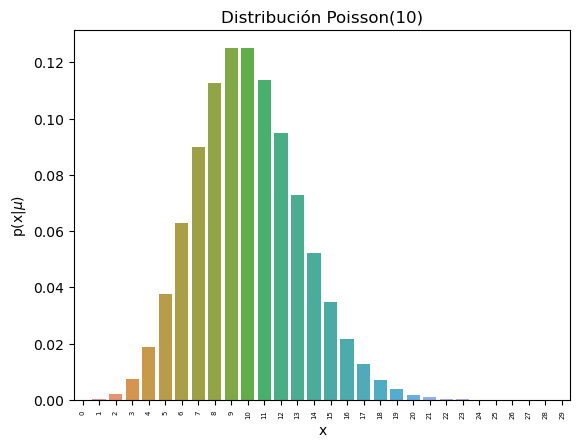

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson 

mu = 10
pois = poisson(mu)
import pandas as pd
x = np.arange(30)
prob_p = pois.pmf(x)
data = pd.DataFrame(zip(x,prob_p))
data.columns=['x','p']
ax = sns.barplot(data=data, x='x', y='p')
ax.set(xlabel='x', ylabel='p(x|$\theta$)', title='Distribución Poisson({})'.format(mu))
ax.set_xticklabels(x, rotation=90, size=5)
plt.show()

Con el siguiente código calculamos la media varianza y algunos cuantiles de la distribución $\text{Pois}(10)$.

In [17]:
# media y varianza de la distribución Poisson(17.5)
import numpy as np
from scipy.stats import poisson 

mu = 10
pois = poisson(mu)
media, var = pois.stats(moments="mv")
print('Distribución Poisson(10); media = {}, varianza {}'.format(media, var))

# calcula algunos cuantiles de la distribución
prob = np.array([0.25, 0.5, 0.75])
cuantiles = pois.ppf(prob)
print('Distribución Poisson(10); probabilidades={}; cuantiles={}'.format(prob, cuantiles))

Distribución Poisson(10); media = 10.0, varianza 10.0
Distribución Poisson(10); probabilidades=[0.25 0.5  0.75]; cuantiles=[ 8. 10. 12.]


### <span style="color:#4CC9F0">Distribución Binomial</span>

La distribución Binomial surge en problemas con ensayos binarios que pueden resultar en éxito (1) o fallo (0). Si se realizan $n$ ensayos (de Bernoulli) de forma independiente y se define la variable aleatoria $y$ como el  número de éxitos, entonces se dice que $Y$ tiene distribución Binomial con parámetro $\theta$, cuya densidad es dada por:

$$
p(y|\theta) = \binom{n}{y}\theta^y(1-\theta)^{n-y}, \hspace{1mm} y=1,\ldots,n,
$$

en donde 

$$
\binom{n}{y} =\frac{n!}{y!(n-y)!}
$$

es el número de grupos diferentes de tamaño $y$, que se pueden organizar si se tienen en total $n$ elementos. Esta distribución se denota $\text{Binom}(n,\theta)$. La densidad se puede reescribir como

$$
p(y|\theta) = \exp\left[ y \log \theta - y\log(1-\theta) + n\log (1-\theta) + \log \binom{n}{y} \right],
$$

de donde se tiene que:

* la densidad está en forma canónica: $a(y) =y$,
* parámetro natural: $b(\theta) = \log \theta - log (1-\theta) = \log\left[\frac{\theta}{1-\theta} \right]$,
* $c(\theta) = n \log(1-\theta)$,
* $d(y) = \log \binom{n}{y}$.

Se puede verificar que si una variable aleatoria $Y$ tiene distribución $\text{Binom}(n,\theta)$, entonces se tiene que

* $E[Y] = n\theta$.
* $Var[Y] = n\theta(1-\theta)$. 

El siguiente fragmento de código muestra la función de probabilidad de la distribución $\text{Binom}(4,0.25)$


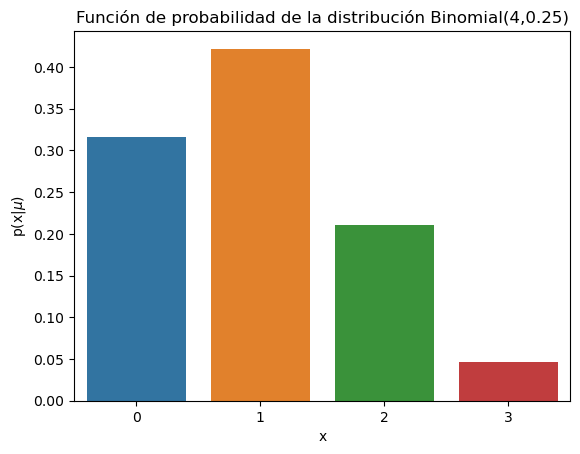

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom

mu = 0.25
n=4
binomial = binom(n, mu)
x = np.arange(4)
prob_p = binomial.pmf(x)
data = pd.DataFrame(zip(x,prob_p))
data.columns=['x','p']
ax = sns.barplot(data=data, x='x', y='p')
ax.set(xlabel='x', ylabel='p(x|$\theta$)', title='Función de probabilidad de la distribución Binomial({},{})'.format(n,mu))
ax.set_xticklabels(x, rotation=0, size=10)
plt.show()

Con el siguiente código calculamos la media varianza y algunos cuantiles de la distribución $\text{Binom(4, 0.25)}$.

In [15]:
# media y varianza de la distribución Binomial(4, 0.25)
import numpy as np
from scipy.stats import binom

mu = 0.25
n=4
binomial = binom(n, mu)

media, var = binomial.stats(moments="mv")
print('Distribución Binomial(4, 0.25); media = {}, varianza {}'.format(media, var))

# calcula algunos cuantiles de la distribución
prob = np.array([0.25, 0.5, 0.75])
cuantiles = binomial.ppf(prob)
print('Distribución Binomial(4, 0.25); probabilidades={}; cuantiles={}'.format(prob, cuantiles))

Distribución Binomial(4, 0.25); media = 1.0, varianza 0.75
Distribución Binomial(4, 0.25); probabilidades=[0.25 0.5  0.75]; cuantiles=[0. 1. 2.]


### <span style="color:#4CC9F0">Propiedades de la familia exponencial</span>

Recordemos que la función de probabilidad (densidad) de una distribución en la familia exponencial se expresa como
$$
f(y|\theta) = \exp\left[a(y)b(\theta) + c(\theta) + d(y) \right].
$$

Adicionalmente la verosimilitud, si no se consideran distribuciones a priori para los parámetros, es la función dada por

$$
f(\theta|y) = \exp\left[a(y)b(\theta) + c(\theta) + d(y) \right],
$$
 en donde la $y$ ha sido observada y en consecuencia se conoce y $\theta$ es ahora la variable en la función.


#### <span style="color:#4CC9F0">Media y varianza de la variable respuesta</span>

Si $Y$ es una variable aleatoria con distribución en la familia exponencial, se puede comprobar que:

* $E[a(Y)] = - \frac{c'(\theta)}{b'(\theta)}$
* $Var[a(Y)] = \frac{b''(\theta)c'(\theta) -c''(\theta)b'(\theta) }{[b'(\theta)]^3}$

## <span style="color:#4361EE">Modelos Lineales Generalizados (GLM) clásicos</span>

En los modelos lineales generalizados clásicos o frecuentista no asumimos una distribución a priori constante. Por ejemplo, es usual tomar como distribución a priori dela parámetros $f(\theta) = 1$, que realmente no es una densidad propia, es decir no suma uno necesariamente. Entonces, la posterior no necesariamente resulta siendo una distribución, por lo que la tratamos simplemente como una función de los parámetros.

Un modelo lineal generalizado GLM(por su sigla en inglés), se define de la configura de la siguiente forma. Asumimos que se tienen variables aleatorias independientes $Y_1, \ldots, Y_n$, cada una con distribución en la familia exponencial tal que

* `Componente aleatoria`: $f(y_i|\theta) = \exp \left[y_ib(\theta_i) + c(\theta_i) + d(y_i) \right]$. 

* Todas las distribuciones tiene la misma forma Normal, Binomial, Poisson,..., pero probablemente distintos parámetros. Denotemos $\mathbf{y}= (y_1, \ldots, y_n)$, $\boldsymbol{\theta} = (\theta_1, \ldots, \theta_n)$. Entonces la función de densidad conjunta es dada por
$$
f(\mathbf{y}|\boldsymbol{\theta}) = \prod_{i=1}^n \exp \left[y_ib(\theta_i) + c(\theta_i) + d(y_i)  \right] = \exp \left[\sum_{i=1}^n y_ib(\theta_i) + \sum_{i=1}^nc(\theta_i) + \sum_{i=1}^nd(y_i)  \right]
$$

* `Componente sistemática`: Se supone que las esperanzas de las $E[Y_i]$  son dadas por $E[Y_i]= \mu_i$. Antes hemos mencionado que  se tiene que $E[Y] = - \frac{c'(\theta)}{b'(\theta)}$. De esta forma las esperanzas $\mu_i$ se relacionan con los parámetros $\theta_i$, mediante la función invertible $h(\theta)=   - \frac{c'(\theta)}{b'(\theta)}$. Es decir, tenemos que 
$$
\mu_i = h(\theta_i).
$$
Los parámetros $\mu_i$ están relacionados con parámetros estructurales $\boldsymbol{\beta}= (\beta_1,\ldots, \beta_p)$, con $p<n$ en la forma
$$
g(\mu_i) = \mathbf{x}_i^t\boldsymbol{\beta},
$$
en donde $g$ es una función invertible, llamada `función de enlace` y en donde $\mathbf{x}$ representa un vector de variables observadas.

La idea central es que las $\mathbf{x}_i$ son realizaciones de un vector aleatorio $X=(x_1, \ldots, x_n)$ que se supone permite predecir adecuadamente a los valores observados $y_i$.

Es común escribir $\hat{y_i} = \mu_i$, en el sentido que los valores $\mu_i$ son predictores de las $y_i$. Además observe que

$$
\hat{y_i} = g^{-1}(\mathbf{x}_i^t\boldsymbol{\beta}) =  g^{-1}(x_1\beta_1, \ldots, x_p\beta_p).
$$


## <span style="color:#4361EE">Estimación puntual </span>

Supongamos que se tienen $n$ variables aleatorias independientes $Y=(Y_1, \ldots, Y_n)$. Además supondremos que cada una de las variables aleatorias están indexadas por parámetros $\theta_i$. Es decir $Y_i\sim f(\theta_i)$. Además vamos a suponer que existe una parámetro estructural de tamaño $p$, denotado $\boldsymbol{\beta}$, talque existen variables aleatorias $X_i$ con realizaciones $x_{ij}$ tal que

$$
g(\theta_i) = \beta_1 x_{1i} + \beta_2 x_{2i} + \ldots + \beta_{p} x_{pi}.
$$

La función $g$ se denomina función de enlace. La ecuación anterior pone en  comunicación el parámetro privilegiado $\theta_i$ con una expresión lineal (componente lineal). La función $g$ es necesaria para permitir que la componente lineal del modelo puede ser transportado a la escala del parámetro $\theta_i$.

En el modelo lineal clásico la función de enlace es la función identidad. Es decir, en ese caso se tiene

$$
\theta_i= \beta_1 x_{1i} + \beta_2 x_{2i} + \ldots + \beta_{p} x_{pi} + b.
$$


### <span style="color:#4CC9F0">Función de densidad conjunta</span>

La función de probabilidad conjunta si la variables son independientes es dada por

$$
f(y|\boldsymbol{\beta}, \mathbf{X}) = \prod_{i=1}^n f(y_i|\theta_i) = \prod_{i=1}^n f(y_i|\boldsymbol{\beta}, \mathbf{X}) = \exp \left[\sum_{i=1}^n y_ib(\theta_i) + \sum_{i=1}^nc(\theta_i) + \sum_{i=1}^nd(y_i)  \right]
$$

En donde $\mathbf{X}$ es la matriz completa de observaciones, que se denomina matriz de diseño, que para efectos prácticos se considera constante. Las columnas de la matriz de diseño representan a las variables explicativas. 

### <span style="color:#4CC9F0">Función de log-verosimilitud</span>

La función de log-verosimilitud  es dada por

$$
\begin{align}
L &= \sum_{i=1}^{n} L_i =\log \prod_{i=1}^n f(y_i|\boldsymbol{\beta},\mathbf{X}) = \left[\sum_{i=1}^n y_ib(\theta_i) + \sum_{i=1}^nc(\theta_i) + \sum_{i=1}^nd(y_i)  \right]\\
\mu_i &= h (\theta_i)\\
g(\mu_i) &= \beta_1 x_{1i} + \beta_2 x_{2i} + \ldots + \beta_{p} x_{pi} = \eta_i.
\end{align}
$$


### <span style="color:#4CC9F0">Gradiente de la función de log-verosimilitud</span>

Para estimar $\boldsymbol{\beta}$ se require calcular el gradiente de la función de log-verosimilitud $\nabla_{\boldsymbol{\beta}}L$. Usando la regla de la cadena para derivadas se tiene que

$$
\frac{\partial L}{\partial \beta_j} = U_j= \sum_{i=1}^n \frac{\partial l_i}{\partial\theta_i}\frac{\partial \theta_i}{\partial \mu_i}\frac{\partial \mu_i}{\partial \beta_j}.
$$


Puede verificarse directamente que

$$
\begin{align}
\frac{\partial l_i}{\partial \theta_i}  &= b'(\theta_i)(y_i-\mu_i), \\
\frac{\partial \theta_i}{\partial \mu_i}  &= \frac{1}{\frac{\partial \mu_i}{\partial \theta_i}}\\
\frac{\partial \mu_i}{\partial \theta_i}  &= b'(\theta_i)var(Y_i)\\
\frac{\partial \mu_i}{\partial \beta_j}  &=  \frac{\partial \mu_i}{\partial \eta_i}x_{ij}
\end{align}
$$

Esto es todo lo que se requiere para escribir un algoritmo de optimización basado en el gradiente.

### <span style="color:#4CC9F0">El método de Fisher-Scoring</span>

El método de Fisher-Scoring es un algoritmo muy rápido que se implementa usualmente para este problema e estimar los parámetros $\boldsymbol{\beta}$, por lo rápido. En problemas con muchos datos y muchas variables puede ser más lento que un método basado en el gradiente e incluso prohibitivo.

El método está basado en la `matriz de información`, la cual es la matriz de covarianza de variables score. Concretamente, se tiene que 

$$
U_j = \sum_{i=1}^n \left[ \frac{(y_i-\mu_i)}{Var(Y_i)}x_{ij}\frac{\partial \mu_i}{\partial \eta_i} \right]
$$ 

La matriz de información tiene como elemento $ij$

$$
\mathcal{I}_{jk} = E(U_iU_j) = \sum_{i=1}^n \frac{x_{ij}x_{ik}}{Var(Y_i)}\left( \frac{\partial\mu_i}{\partial \eta_j}  \right)^2.
$$

El algoritmo es una variación del método de Newton y  tiene como ecuación de actualización

$$
\mathbf{b}^{(m+1)} = \mathbf{b}^{(m)} + \left[\mathcal{I}^{(m)} \right]^{-1}U^{(m)}
$$

en donde $\mathbf{b}^{(m)}$ es  la estimación del parámetro $\boldsymbol{\beta}$ en el paso $m$.
